# 4.3 수치 미분

경사법: 기울기(경사) 값을 기준으로 나아갈 방향을 설정  
미분을 복습해 보자

## 4.3.1 미분

미분: 특정 순간의 변화량, 수식으로는 다음과 같다.  

<img src = "./image/e_4_4.png">

변화량이라는 말은 x의 작은 변화가 함수 f(x)를 얼마나 변화 시키느냐를 의미한다.  
미분을 파이썬으로 구현하면 다음과 같다. 

In [4]:
# 나쁜 구현 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) -f(x)) / h

numerical_diff: 수치 미분 (nummerical differentation) -> 아주 작은 차분으로 미분하는 것  
위의 함수는 개선해야하는 점이 2가지가 존재한다.  

    1. h의 경우 lim h->0을 표현하기위해 매우 작은수로 표현  
    그러나 이 방식은 반올림 오차 문제를 일으킨다. (작은 값을 생략하여 최종 계산 결과가 달라짐)  
    따라서 값을 10^-4정도의 값으로 조정하면 좋은 결과를 얻을 수 있다고 한다.  
    2. 함수 f의 차분, 진정한 미분은 x위치 함수의 기울기에 해당하지만 위의 함수는 근접한 값이지  
    진짜 미분 값이 아님

In [8]:
# 1번 오류 증명
import numpy as np

np.float32(1e-50) # 실제로는 0이 아니지만 0으로 인식

0.0

<img src = "./image/fig_4_5.png" width="30%">

위 그림과 같이 미분의 값에 오차가 존재한다.  
오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수f의 차분을 계산하는 방법을 쓰기도 한다.  
이러한 방식을 중심 차분 (중앙 차분)이라고 부른다. ((x+h)와 x의 차분은 전방 차분이라고 한다.)  

In [30]:
# 개선점을 적용한 미분 구현

def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 4.3.2 수치미분의 예  

<img src = "./image/e_4_5.png" width = "20%">  

위의 식을 구현헤보고 함수로 그려보자  

In [31]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

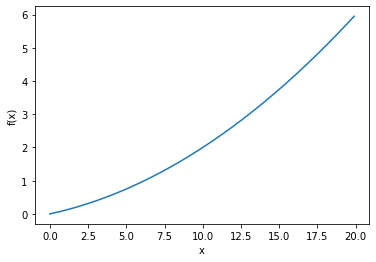

In [32]:
import numpy as np 
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [33]:
print(numerical_diff(function_1, 5)) # x=5의 미분 값

print(numerical_diff(function_1, 10)) # x= 10의 미분 값

0.1999999999990898
0.2999999999986347


<img src = "./image/fig_4_7.png" width="60%">  

## 4.3.3 편미분  

<img src = "./image/e_4_6.png">  

변수가 2개라는 점에 대해서 유의  

In [34]:
def function_2(x):
    return x[0]**2 + x[1]**2 #혹은 np.sum(x**2)로도 구현 가능

함수를 그래프로 나타내면 다음과 같다.  

<img src = "./image/fig_4_8.png" width="30%">  

이 식을 미분하기 위해서는 변수가 2개라는 점을 유의해야 한다.  
즉 어느 변수에 대해서 미분할지를 구별해야 한다.  
이와 같이 변수가 여러개읜 함수에 대한 미분을 **편미분**이라고 한다.  
편미분을 구현해보면 다음과 같다.  

In [36]:
# 문제 1 x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하자

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378